In [ ]:
#import locale for google colab
#locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
pip install easyocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 21.7 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO
import torch
from PIL import Image
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import easyocr

In [ ]:
"""
# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # 'n' for nano, try 's', 'm', 'l', or 'x' for larger models

# Freeze the backbone
for param in model.model.model[:10].parameters():
    param.requires_grad = False

# Configure the model for your specific task
model.model.model[-1].nc = 2  # number of classes (Paragraph and Table)

# Fine-tune the model
results = model.train(data='path/to/data.yaml', epochs=100, imgsz=640)

# Evaluate the model
results = model.val()
"""


In [ ]:
"""
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_model(num_classes):
    # load pre-trained model
    model = fasterrcnn_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Create the model
model = get_model(num_classes=2)  # 2 classes: Paragraph, Table

# Train and evaluate (you'll need to implement these functions)
train(model, train_loader, optimizer, num_epochs)
evaluate(model, val_loader)
"""

In [ ]:
"""
# Load a larger pre-trained YOLOv8 model
model = YOLO("yolov8s.pt")  # 's' for small, or try 'm', 'l' for larger models

# Configure the model for your specific task (if needed)
model.model.model[-1].nc = 2  # number of classes (Paragraph and Table)

# Fine-tune the model with more epochs and custom hyperparameters
results = model.train(
    data="data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    augment=True
)

# Evaluate the model
metrics = model.val()
"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os

#os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [20]:
model = YOLO("yolov9s.pt")
model.info()

100%|██████████| 14.7M/14.7M [00:00<00:00, 54.9MB/s]


YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [25]:
model.train(data="/content/drive/MyDrive/Colab Notebooks/Yolov9/data.yaml", epochs=200, patience=20)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/drive/MyDrive/Colab Notebooks/Yolov9/data.yaml, epochs=200, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Yolov9/train/labels... 656 images, 0 backgrounds, 0 corrupt: 100%|██████████| 656/656 [04:32<00:00,  2.41it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/Yolov9/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Yolov9/val/labels... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [01:03<00:00,  1.17it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/Yolov9/val/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       5.3G      1.583       2.43      1.513        242        640: 100%|██████████| 41/41 [00:31<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all         74        520      0.527      0.489      0.512      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.09G      1.279      1.466      1.313        206        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74        520      0.403      0.477      0.396      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       5.1G      1.295      1.391       1.32        199        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         74        520      0.254      0.347      0.172     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       5.1G      1.251      1.311      1.295        192        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         74        520      0.296      0.314      0.163     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       5.1G      1.239      1.257       1.29        213        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


                   all         74        520      0.656       0.57      0.625      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       5.1G      1.188      1.181      1.262        231        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         74        520      0.701      0.579      0.662      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200       5.1G      1.162      1.118      1.242        208        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         74        520      0.796      0.694      0.783      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.11G      1.148      1.071      1.236        183        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         74        520      0.608      0.633      0.672      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.09G      1.143      1.068      1.232        250        640: 100%|██████████| 41/41 [00:24<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         74        520      0.664       0.67      0.701       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.03G       1.14      1.065      1.233        221        640: 100%|██████████| 41/41 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         74        520      0.518      0.637      0.628      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.12G      1.066       1.01        1.2        252        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         74        520      0.718      0.679      0.734      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.09G      1.071     0.9834      1.208        249        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         74        520      0.743      0.691      0.729      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.13G      1.075      1.013      1.201        237        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         74        520       0.73      0.676      0.761      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.11G      1.054     0.9559      1.165        218        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        520      0.788      0.667      0.748      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       5.1G      1.046     0.9047      1.184        224        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         74        520      0.391      0.456      0.389      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       5.1G      1.021     0.8878      1.165        230        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         74        520      0.713      0.775      0.797      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.09G     0.9993     0.8859       1.15        199        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         74        520      0.667       0.65      0.639      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200       5.1G      1.042     0.8961      1.171        221        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         74        520      0.614      0.519      0.579      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       5.1G       1.04     0.8876      1.174        219        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         74        520      0.738       0.66      0.743      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       5.1G      1.011     0.8788      1.155        180        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         74        520      0.713      0.633       0.72      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.14G      1.018     0.8785      1.161        187        640: 100%|██████████| 41/41 [00:24<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         74        520      0.705      0.722      0.757      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.12G     0.9696     0.8149      1.143        140        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         74        520       0.69        0.6      0.696      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200       5.1G     0.9821     0.8253       1.14        186        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         74        520      0.709      0.627      0.687       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       5.1G      0.981     0.8196      1.149        182        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         74        520      0.824      0.725      0.809       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       5.1G     0.9611     0.7957      1.139        184        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         74        520      0.769      0.728      0.804       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.11G      0.942     0.7804       1.13        236        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         74        520      0.777      0.642      0.765      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       5.1G      0.954     0.7909      1.131        197        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         74        520      0.714      0.733      0.798       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.13G     0.9578     0.7835      1.137        217        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        520       0.71       0.78      0.788      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.11G     0.9417     0.7732      1.119        206        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74        520      0.708      0.732      0.765       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.12G     0.9278     0.7525      1.113        189        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         74        520      0.683      0.701      0.746      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.09G     0.9046     0.7318      1.095        193        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         74        520      0.744      0.733      0.795      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.02G     0.9091      0.743      1.108        233        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         74        520      0.749      0.678      0.767      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       5.1G     0.8952     0.7073      1.096        188        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         74        520      0.803      0.683      0.786      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       5.1G     0.9104     0.7155      1.118        238        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         74        520      0.838       0.66      0.767       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.14G       0.91     0.7222      1.107        234        640: 100%|██████████| 41/41 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         74        520      0.784      0.731      0.787      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.12G     0.8795     0.6933      1.093        259        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         74        520      0.773      0.763      0.823      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.11G      0.884     0.6928      1.093        265        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         74        520      0.759      0.729      0.775      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200       5.1G     0.8812     0.6992      1.095        225        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         74        520      0.748      0.609      0.722      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.11G     0.8854     0.6876        1.1        248        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]


                   all         74        520      0.775      0.653       0.75      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.09G     0.8836     0.6757       1.09        187        640: 100%|██████████| 41/41 [00:34<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         74        520      0.797      0.668      0.761      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.09G     0.8911     0.6766      1.093        211        640: 100%|██████████| 41/41 [00:29<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         74        520      0.732      0.709      0.779      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200       5.1G     0.8708     0.6677      1.087        184        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        520      0.803      0.691      0.783      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.04G       0.84     0.6449      1.066        201        640: 100%|██████████| 41/41 [00:29<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         74        520      0.815      0.776      0.825      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.02G      0.835     0.6444      1.076        197        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         74        520      0.823      0.763      0.822      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       5.1G     0.8605     0.6707      1.087        244        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         74        520      0.762      0.717      0.782      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.14G     0.8493     0.6531      1.073        202        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


                   all         74        520      0.761      0.698      0.765      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.03G       0.87      0.662      1.082        244        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        520      0.762      0.781      0.811      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.13G     0.8429     0.6368      1.071        214        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         74        520      0.824      0.759      0.812      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.14G       0.85     0.6414      1.084        191        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        520      0.859      0.766      0.826      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.14G     0.8403     0.6165      1.083        192        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         74        520      0.739       0.74      0.766      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.09G     0.8338     0.6242      1.072        200        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         74        520      0.806      0.675      0.779      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.06G     0.8299     0.6287      1.069        164        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         74        520      0.741      0.737        0.8      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.13G     0.8432     0.6374      1.072        212        640: 100%|██████████| 41/41 [00:24<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        520      0.792      0.761        0.8      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       5.1G     0.8133     0.5998      1.066        240        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         74        520      0.786      0.812       0.83      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.04G     0.8139     0.6049      1.059        234        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         74        520      0.798      0.781      0.835      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200       5.1G     0.7899     0.5803      1.043        248        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]


                   all         74        520      0.824      0.761      0.828      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.09G     0.8205     0.6078      1.059        173        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         74        520      0.799      0.731      0.813      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       5.1G     0.7996      0.579       1.05        214        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         74        520      0.752      0.755      0.788      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.12G     0.8139     0.5913      1.052        201        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         74        520      0.794      0.604      0.728      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.09G     0.8048     0.5887       1.05        178        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         74        520      0.821      0.755      0.822        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.14G     0.7865     0.5696      1.046        202        640: 100%|██████████| 41/41 [00:25<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         74        520      0.803      0.713      0.763      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.02G     0.7703     0.5525      1.039        183        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         74        520      0.789      0.755      0.804      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.09G     0.7799     0.5663      1.046        167        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         74        520      0.794      0.722      0.793      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200       5.1G     0.7724     0.5705      1.049        173        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         74        520      0.852      0.771      0.819      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.11G     0.7939     0.5669      1.045        175        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         74        520      0.761      0.768      0.808       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.11G     0.7779     0.5588      1.037        191        640: 100%|██████████| 41/41 [00:24<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         74        520      0.828      0.755      0.809      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       5.1G     0.7881     0.5727      1.049        224        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all         74        520        0.8      0.708      0.789      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.09G     0.7499     0.5514       1.03        189        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        520      0.783      0.767      0.811      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.12G     0.7595     0.5741      1.041        177        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         74        520      0.801      0.741      0.797      0.607


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

69 epochs completed in 0.519 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 15.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,862 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all         74        520      0.858      0.766      0.826      0.632
             Paragraph         74        431      0.741      0.645      0.707      0.472
                 Table         74         89      0.975      0.887      0.945      0.793
Speed: 0.4ms preprocess, 8.4ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f531cd82da0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [26]:
metrics = model.val()
metrics

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,862 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/Yolov9/val/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


                   all         74        520       0.86      0.766      0.826      0.631
             Paragraph         74        431      0.744      0.645      0.707      0.472
                 Table         74         89      0.975      0.888      0.945       0.79
Speed: 1.0ms preprocess, 21.1ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to runs/detect/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f530f026d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [57]:
invoice_path = "/content/drive/MyDrive/Colab Notebooks/Yolov9/20190626110116-201906141659416300002_650bb8d2d_da455ecff82af548d2fabb64a1a1e80b_page_1.png"
prediction = model.predict(source = invoice_path,agnostic_nms=True, conf = 0.6)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Yolov9/20190626110116-201906141659416300002_650bb8d2d_da455ecff82af548d2fabb64a1a1e80b_page_1.png: 640x480 7 Paragraphs, 1 Table, 32.2ms
Speed: 5.3ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


In [58]:
img = Image.open(invoice_path)
results = model(source=invoice_path)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Yolov9/20190626110116-201906141659416300002_650bb8d2d_da455ecff82af548d2fabb64a1a1e80b_page_1.png: 640x480 10 Paragraphs, 2 Tables, 16.2ms
Speed: 2.6ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)



image 1/1 /content/drive/MyDrive/Colab Notebooks/Yolov9/20190626110116-201906141659416300002_650bb8d2d_da455ecff82af548d2fabb64a1a1e80b_page_1.png: 640x480 10 Paragraphs, 2 Tables, 26.1ms
Speed: 4.0ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

Table_7 text:
- Désignation (confidence: 1.00)
- Quantité (confidence: 1.00)
- PU. HT (confidence: 0.58)
- Montant (confidence: 1.00)

Table_10 text:
- Chalet B1 (confidence: 0.97)
- NETTOYAGE DES PARTIES COMMUNES (confidence: 0.97)
- 1,00 (confidence: 0.99)
- 159,88 (confidence: 0.98)
- 159,88 (confidence: 0.90)
- NETTOYAGE DES GARAGES LE 23/05/2019 (confidence: 0.95)

Paragraph_1 text:
- Facture NO (confidence: 0.21)
- FE 46428 (confidence: 0.81)
- Date (confidence: 1.00)
- vendredi 31 mai 2019 (confidence: 0.59)
- Client (confidence: 1.00)
- 411162 (confidence: 1.00)

Paragraph_2 text:
- LES CIMES DU MT D'ARBOIS (confidence: 0.98)
- IMMO VALLEY (confidence: 1.00)
- 586 ROUTE NATIONALE (confidence: 0.8

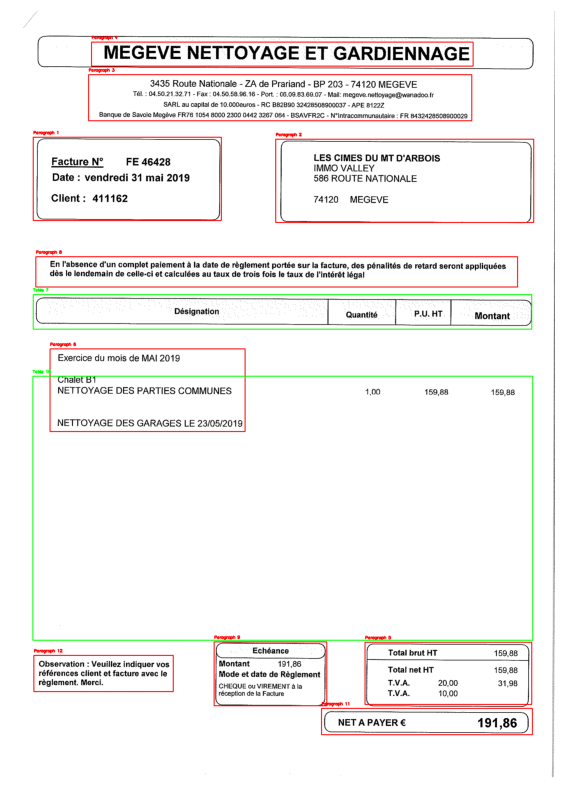

In [59]:
    # Load and process the image
    image_filename = invoice_path
    image = Image.open(image_filename).convert("RGB")
    image_array = np.array(image)

    # Perform inference with YOLO model
    results = model(image_filename)

    # Extract bounding boxes, classes, and labels from YOLO results
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes as [x_min, y_min, x_max, y_max]
    classes = results[0].boxes.cls.cpu().numpy()  # Class indices
    names = results[0].names  # Dictionary mapping class indices to class names

    # Convert class indices to class names
    labels = [names[int(cls)] for cls in classes]

    # Filter and enumerate bounding boxes for 'Paragraph' and 'Table'
    paragraph_boxes = [(i+1, box) for i, (box, label) in enumerate(zip(boxes, labels)) if label == 'Paragraph']
    table_boxes = [(i+1, box) for i, (box, label) in enumerate(zip(boxes, labels)) if label == 'Table']

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['fr', 'es', 'en'])

    # Function to extract text from bounding boxes
    def extract_text(numbered_boxes):
        extracted_texts = {}
        for number, bbox in numbered_boxes:
            x_min, y_min, x_max, y_max = map(int, bbox)
            cropped_image = image_array[y_min:y_max, x_min:x_max]
            ocr_results = reader.readtext(cropped_image)
            box_text = []
            for (ocr_bbox, text, prob) in ocr_results:
                box_text.append((text, prob))
            extracted_texts[number] = box_text
        return extracted_texts

    # Extract text for paragraphs and tables
    paragraph_texts = extract_text(paragraph_boxes)
    table_texts = extract_text(table_boxes)

    extracted_text = {}

    # Add numbered tables to the dictionary
    for number, texts in table_texts.items():
        extracted_text[f'Table_{number}'] = texts

    # Add numbered paragraphs to the dictionary
    for number, texts in paragraph_texts.items():
        extracted_text[f'Paragraph_{number}'] = texts

    # Print the extracted text
    for class_name, texts in extracted_text.items():
        print(f"\n{class_name} text:")
        for text, prob in texts:
            print(f"- {text} (confidence: {prob:.2f})")

    # Function to plot bounding boxes on the image
    def plot_boxes(image_path, paragraph_boxes, table_boxes):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for number, box in paragraph_boxes:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'Paragraph {number}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 2)

        for number, box in table_boxes:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'Table {number}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)

        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    # Plot bounding boxes on the image
    plot_boxes(image_filename, paragraph_boxes, table_boxes)

In [1]:
drive.flush_and_unmount()

NameError: name 'drive' is not defined